# Kings County Real Estate Firm Recommendation Project

### FIRM: Seattle Rental Group / Pointe3 - Condo and home leasing service as well as sell/purchase group

In this notebook, we will be exploring the Kings County real estate sales data to identify key features that drive prices up in housing sales in order to maximize the market value of a home to sell for the highest profit margin. In identifying these key features, we can recommend to remodel houses, multifamily units, to increase their value and rent/sell at higher prices.

### Business Problem

What does our stakeholder want ???????????????
- High sale price
- How we get there
    - isolate features that increase market value

models
- include what we need only initially 
- add as we go in order to make it more valuable/fitting/


In [1]:
!ls data


column_names.md
kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
from numbers import Number
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from sklearn.feature_selection import RFE
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### The data

- The data is relevant for our analysis because we are focusing in the King's County area and this set has information about housing sales in King's County. Below we can see the data set includes 21,597 records and of 21 features of information
- The source for this data is from the official government website of King's County

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.shape

(21597, 21)

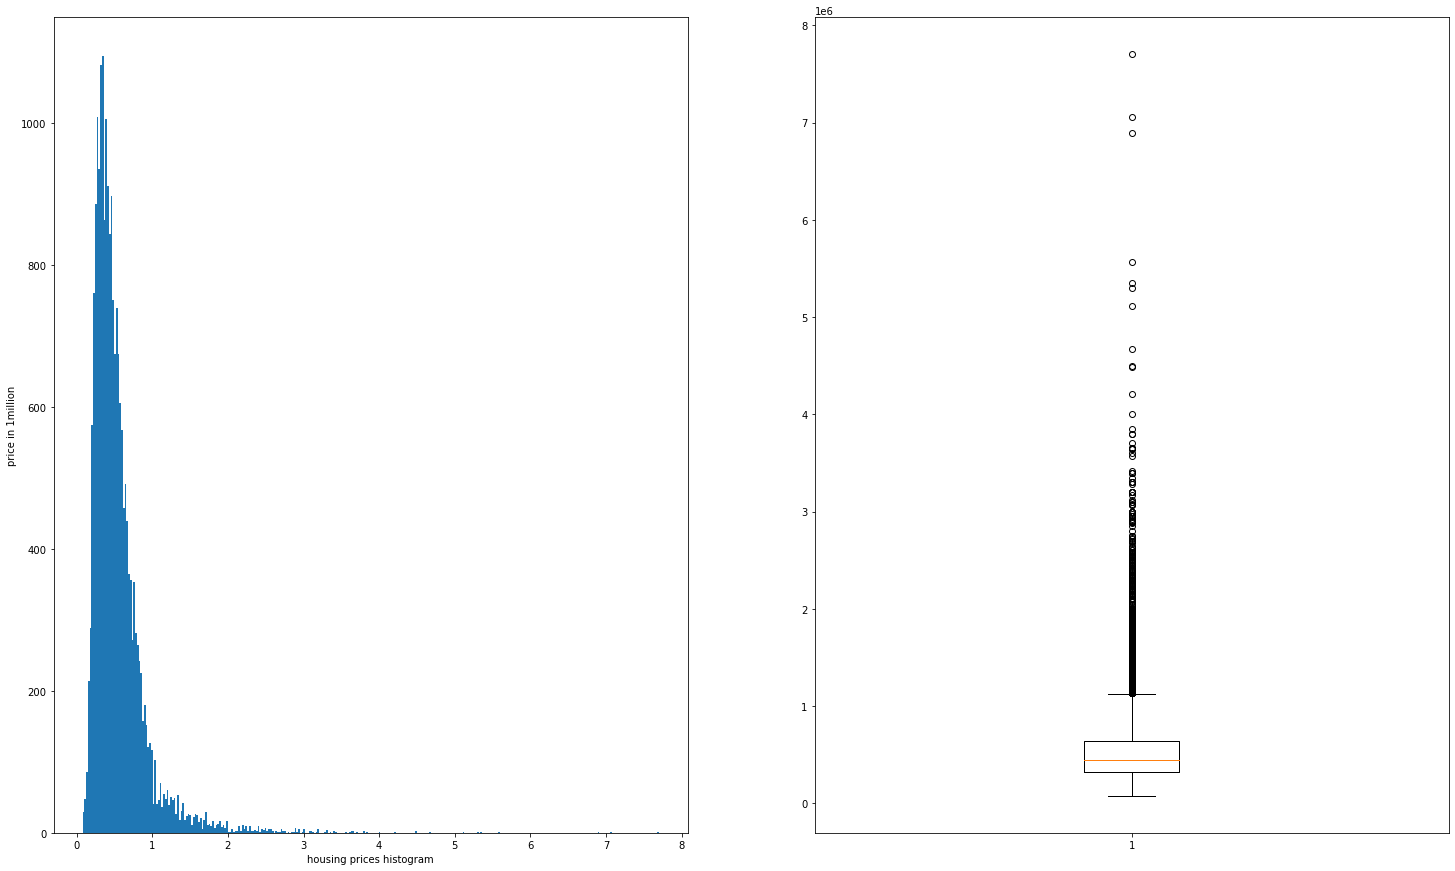

In [4]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(25, 15))
ax.hist(df['price']/1000000, bins='auto')
ax.set_xlabel('housing prices histogram')
ax.set_ylabel('price in 1million')
ax1.boxplot(df['price']);

We can see that prices are heavily skewed and most of the housing prices are below 2,000,000.00

#### We will be filtering out the columns by relevancy down to 12 core columns total.

In [5]:
df = df[['price', 'id', 'sqft_living', 'grade', 'bathrooms', 'bedrooms', 'waterfront', 'floors', 'sqft_lot', 'yr_built', 'condition', 'date']]

In [6]:
df.describe()

,price,id,sqft_living,grade,bathrooms,bedrooms,waterfront,floors,sqft_lot,yr_built,condition
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,2080.321850,7.657915,2.115826,3.373200,0.007596,1.494096,1.509941e+04,1970.999676,3.409825
std,3.673681e+05,2.876736e+09,918.106125,1.173200,0.768984,0.926299,0.086825,0.539683,4.141264e+04,29.375234,0.650546
min,7.800000e+04,1.000102e+06,370.000000,3.000000,0.500000,1.000000,0.000000,1.000000,5.200000e+02,1900.000000,1.000000
25%,3.220000e+05,2.123049e+09,1430.000000,7.000000,1.750000,3.000000,0.000000,1.000000,5.040000e+03,1951.000000,3.000000
50%,4.500000e+05,3.904930e+09,1910.000000,7.000000,2.250000,3.000000,0.000000,1.500000,7.618000e+03,1975.000000,3.000000
75%,6.450000e+05,7.308900e+09,2550.000000,8.000000,2.500000,4.000000,0.000000,2.000000,1.068500e+04,1997.000000,4.000000
max,7.700000e+06,9.900000e+09,13540.000000,13.000000,8.000000,33.000000,1.000000,3.500000,1.651359e+06,2015.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   id           21597 non-null  int64  
 2   sqft_living  21597 non-null  int64  
 3   grade        21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   bedrooms     21597 non-null  int64  
 6   waterfront   19221 non-null  float64
 7   floors       21597 non-null  float64
 8   sqft_lot     21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  condition    21597 non-null  int64  
 11  date         21597 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 2.0+ MB


In [8]:
dont_need = ['view', 
             'sqft_above',
             'sqft_basement',
             'yr_renovated',
             'zipcode',
             'lat',
             'long',
             'sqft_living15',
             'sqft_lot15']

#### Changing date to datetime

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   price        21597 non-null  float64       
 1   id           21597 non-null  int64         
 2   sqft_living  21597 non-null  int64         
 3   grade        21597 non-null  int64         
 4   bathrooms    21597 non-null  float64       
 5   bedrooms     21597 non-null  int64         
 6   waterfront   19221 non-null  float64       
 7   floors       21597 non-null  float64       
 8   sqft_lot     21597 non-null  int64         
 9   yr_built     21597 non-null  int64         
 10  condition    21597 non-null  int64         
 11  date         21597 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 2.0 MB


In [11]:
df.drop(['date', 'id'], axis=1, inplace=True)

#### Filling in the nan's in waterfront to 0 as it most likely means the building isn't a waterfront property.

In [12]:
df.isna().sum()

price             0
sqft_living       0
grade             0
bathrooms         0
bedrooms          0
waterfront     2376
floors            0
sqft_lot          0
yr_built          0
condition         0
dtype: int64

In [13]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
df['waterfront'].fillna(0, inplace=True)

In [15]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

#### Identifying and converting categorical variables

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   grade        21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   bedrooms     21597 non-null  int64  
 5   waterfront   21597 non-null  float64
 6   floors       21597 non-null  float64
 7   sqft_lot     21597 non-null  int64  
 8   yr_built     21597 non-null  int64  
 9   condition    21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [17]:
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:10])
    except:
        print(col, df[col].value_counts())

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
1800    129
1820    128
1480    125
1720    125
1540    124
Name: sqft_living, dtype: int64
grade 7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
Name: grade, dtype: int64
bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
bedrooms 3     9824
4     6882
2     2760
5     1601
6 

In [18]:
df.nunique()

price          3622
sqft_living    1034
grade            11
bathrooms        29
bedrooms         12
waterfront        2
floors            6
sqft_lot       9776
yr_built        116
condition         5
dtype: int64

We can observe the columns grade, bathrooms, bedrooms, floors, and condition are categorical variables and can encode them to work with our models better.

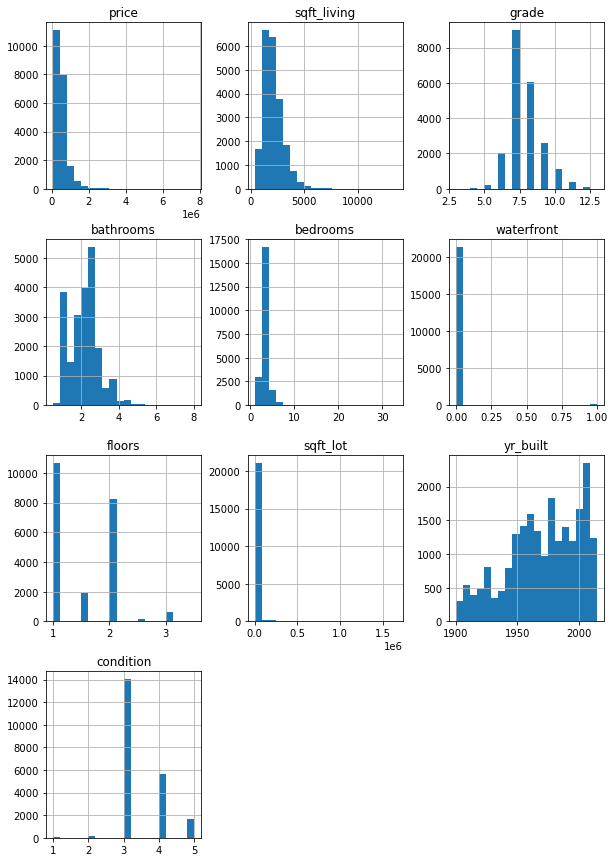

In [19]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax=ax, bins=20);

 - Encoding Grade

In [20]:
df['grade'] = df['grade'].astype('float32')
df['grade'] = df['grade'].astype('str')

In [21]:
df['grade'].value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
grade_ohe = df[['grade']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(grade_ohe)
ohe.categories

'auto'

In [24]:
grade_encoded = ohe.transform(grade_ohe)
grade_encoded[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [25]:
type(ohe.categories_[0])

numpy.ndarray

In [26]:
for category in ohe.categories_:
    ohe.categories_[0] = 'gr_' + category

In [27]:
(ohe.categories_[0])

array(['gr_10.0', 'gr_11.0', 'gr_12.0', 'gr_13.0', 'gr_3.0', 'gr_4.0',
       'gr_5.0', 'gr_6.0', 'gr_7.0', 'gr_8.0', 'gr_9.0'], dtype=object)

In [28]:
grade_encoded = pd.DataFrame(grade_encoded, columns=ohe.categories_[0], index=df.index)
grade_encoded

,gr_10.0,gr_11.0,gr_12.0,gr_13.0,gr_3.0,gr_4.0,gr_5.0,gr_6.0,gr_7.0,gr_8.0,gr_9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df

,price,sqft_living,grade,bathrooms,bedrooms,waterfront,floors,sqft_lot,yr_built,condition
0,221900.0,1180,7.0,1.00,3,0.0,1.0,5650,1955,3
1,538000.0,2570,7.0,2.25,3,0.0,2.0,7242,1951,3
2,180000.0,770,6.0,1.00,2,0.0,1.0,10000,1933,3
3,604000.0,1960,7.0,3.00,4,0.0,1.0,5000,1965,5
4,510000.0,1680,8.0,2.00,3,0.0,1.0,8080,1987,3
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,8.0,2.50,3,0.0,3.0,1131,2009,3
21593,400000.0,2310,8.0,2.50,4,0.0,2.0,5813,2014,3
21594,402101.0,1020,7.0,0.75,2,0.0,2.0,1350,2009,3
21595,400000.0,1600,8.0,2.50,3,0.0,2.0,2388,2004,3


In [30]:
df.drop('grade', axis=1, inplace=True)

In [31]:
df = pd.concat([df, grade_encoded], axis=1)

In [32]:
df

,price,sqft_living,bathrooms,bedrooms,waterfront,floors,sqft_lot,yr_built,condition,gr_10.0,gr_11.0,gr_12.0,gr_13.0,gr_3.0,gr_4.0,gr_5.0,gr_6.0,gr_7.0,gr_8.0,gr_9.0
0,221900.0,1180,1.00,3,0.0,1.0,5650,1955,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,538000.0,2570,2.25,3,0.0,2.0,7242,1951,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,180000.0,770,1.00,2,0.0,1.0,10000,1933,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,604000.0,1960,3.00,4,0.0,1.0,5000,1965,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,510000.0,1680,2.00,3,0.0,1.0,8080,1987,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,2.50,3,0.0,3.0,1131,2009,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,400000.0,2310,2.50,4,0.0,2.0,5813,2014,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,402101.0,1020,0.75,2,0.0,2.0,1350,2009,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,400000.0,1600,2.50,3,0.0,2.0,2388,2004,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Encoding Bathrooms

In [33]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

We can observe that few houses have greater than 5 bathrooms overall so we combine anything greater than 5 as 5 bathrooms and round .25's and .75's down to the nearest .0 or .5

In [34]:
df['bathrooms'].replace(1.75, 1.50, inplace=True)
df['bathrooms'].replace(2.25, 2.0, inplace=True)
df['bathrooms'].replace(0.75, 0.5, inplace=True)
df['bathrooms'].replace(2.75, 2.50, inplace=True)
df['bathrooms'].replace(3.25, 3.0, inplace=True)
df['bathrooms'].replace(3.75, 3.50, inplace=True)
df['bathrooms'].replace(4.75, 4.5, inplace=True)
df['bathrooms'].replace(4.25, 4.00, inplace=True)
df['bathrooms'].replace(5.75, 5.0, inplace=True)
df['bathrooms'].replace(6.75, 5.0, inplace=True)
df['bathrooms'].replace(5.25, 5.0, inplace=True)
df['bathrooms'].replace(6.50, 5.0, inplace=True)
df['bathrooms'].replace(6.25, 5.0, inplace=True)
df['bathrooms'].replace(7.75, 5.0, inplace=True)
df['bathrooms'].replace(7.5, 5.0, inplace=True)
df['bathrooms'].replace(7.25, 5.0, inplace=True)
df['bathrooms'].replace(8.0, 5.0, inplace=True)
df['bathrooms'].replace(8.25, 5.0, inplace=True)
df['bathrooms'].replace(5.50, 5.0, inplace=True)
df['bathrooms'].replace(6.0, 5.0, inplace=True)
df['bathrooms'].replace(1.25, 1.0, inplace=True)

In [35]:
df['bathrooms'] = df['bathrooms'].astype('float32')
df['bathrooms'] = df['bathrooms'].astype('str')

In [36]:
bathroom_ohe = df[['bathrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(bathroom_ohe)
ohe.categories

'auto'

In [37]:
bathroom_encoded = ohe.transform(bathroom_ohe)

In [38]:
for category in ohe.categories_:
    ohe.categories_[0] = 'bath_' + category

In [39]:
bathroom_encoded = pd.DataFrame(bathroom_encoded, columns=ohe.categories_[0], index=df.index)


In [40]:
df.drop('bathrooms', axis=1, inplace=True)
df = pd.concat([df, bathroom_encoded], axis=1)

- Encoding Bedrooms

In [41]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We can see a bedroom with 33 rooms in it. Not a normal kind of house so we can drop it.

In [42]:
df = df[df['bedrooms'] < 12]

In [43]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [44]:
df['bedrooms'] = df['bedrooms'].astype('float32')
df['bedrooms'] = df['bedrooms'].astype('str')

In [45]:
bedroom_ohe = df[['bedrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(bedroom_ohe)
ohe.categories

'auto'

In [46]:
bedroom_encoded = ohe.transform(bedroom_ohe)

In [47]:
for category in ohe.categories_:
    ohe.categories_[0] = 'bed_'+ category 

In [48]:
bedroom_encoded = pd.DataFrame(bedroom_encoded, columns=ohe.categories_[0], index=df.index)


In [49]:
df.drop('bedrooms', axis=1, inplace=True)
df = pd.concat([df, bedroom_encoded], axis=1)

- Encoding Floors

In [50]:
df['floors'].value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

We can see there's half floors, but half floors are generally not normal so we can round 1.5 and 2.5 up and 3.5 down.

In [51]:
df['floors'].replace(1.5, 2, inplace=True)
df['floors'].replace(2.5, 3, inplace=True)
df['floors'].replace(3.5, 3, inplace=True)

In [52]:
df['floors'] = df['floors'].astype('float32')
df['floors'] = df['floors'].astype('str')

In [53]:
floors_ohe = df[['floors']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(floors_ohe)
ohe.categories

'auto'

In [54]:
floors_encoded = ohe.transform(floors_ohe)

In [55]:
for category in ohe.categories_:
    ohe.categories_[0] = 'floor_' + category 

In [56]:
floors_encoded = pd.DataFrame(floors_encoded, columns=ohe.categories_[0], index=df.index)
floors_encoded

,floor_1.0,floor_2.0,floor_3.0
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
21592,0.0,0.0,1.0
21593,0.0,1.0,0.0
21594,0.0,1.0,0.0
21595,0.0,1.0,0.0


In [57]:
df.drop('floors', axis=1, inplace=True)
df = pd.concat([df, floors_encoded], axis=1)

- Encoding Condition

In [58]:
df['condition'].value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [59]:
df['condition'] = df['condition'].astype('float32')
df['condition'] = df['condition'].astype('str')

In [60]:
cond_ohe = df[['condition']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(cond_ohe)
ohe.categories

'auto'

In [61]:
cond_encoded = ohe.transform(cond_ohe)

In [62]:
for category in ohe.categories_:
    ohe.categories_[0] = category + '_cond'

In [63]:
cond_encoded = pd.DataFrame(cond_encoded, columns=ohe.categories_[0], index=df.index)
cond_encoded

,1.0_cond,2.0_cond,3.0_cond,4.0_cond,5.0_cond
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21592,0.0,0.0,1.0,0.0,0.0
21593,0.0,0.0,1.0,0.0,0.0
21594,0.0,0.0,1.0,0.0,0.0
21595,0.0,0.0,1.0,0.0,0.0


In [64]:
df.drop('condition', axis=1, inplace=True)
df = pd.concat([df, cond_encoded], axis=1)

In [65]:
df.columns


Index(['price', 'sqft_living', 'waterfront', 'sqft_lot', 'yr_built', 'gr_10.0',
       'gr_11.0', 'gr_12.0', 'gr_13.0', 'gr_3.0', 'gr_4.0', 'gr_5.0', 'gr_6.0',
       'gr_7.0', 'gr_8.0', 'gr_9.0', 'bath_0.5', 'bath_1.0', 'bath_1.5',
       'bath_2.0', 'bath_2.5', 'bath_3.0', 'bath_3.5', 'bath_4.0', 'bath_4.5',
       'bath_5.0', 'bed_1.0', 'bed_10.0', 'bed_11.0', 'bed_2.0', 'bed_3.0',
       'bed_4.0', 'bed_5.0', 'bed_6.0', 'bed_7.0', 'bed_8.0', 'bed_9.0',
       'floor_1.0', 'floor_2.0', 'floor_3.0', '1.0_cond', '2.0_cond',
       '3.0_cond', '4.0_cond', '5.0_cond'],
      dtype='object')

In [66]:
#pd.plotting.scatter_matrix(df)

In [67]:
#####################sns.pairplot(df)

In [68]:
df.corr()

,price,sqft_living,waterfront,sqft_lot,yr_built,gr_10.0,gr_11.0,gr_12.0,gr_13.0,gr_3.0,...,bed_8.0,bed_9.0,floor_1.0,floor_2.0,floor_3.0,1.0_cond,2.0_cond,3.0_cond,4.0_cond,5.0_cond
price,1.000000,0.701929,0.264308,0.089879,0.053965,0.340948,0.357592,0.291070,0.211807,-0.005155,...,0.037731,0.016051,-0.263539,0.235520,0.076239,-0.019886,-0.051431,0.006966,-0.030751,0.057504
sqft_living,0.701929,1.000000,0.104635,0.173449,0.318140,0.369225,0.345963,0.238136,0.144424,-0.011565,...,0.045969,0.030771,-0.374337,0.375378,-0.001017,-0.033247,-0.063987,0.102034,-0.083865,-0.018210
waterfront,0.264308,0.104635,1.000000,0.021458,-0.024491,0.051513,0.068409,0.082899,-0.002025,-0.000561,...,-0.002025,-0.001375,-0.021642,0.018585,0.008284,0.012406,-0.000955,-0.017504,0.009783,0.013654
sqft_lot,0.089879,0.173449,0.021458,1.000000,0.052939,0.074418,0.077103,0.061699,0.007766,-0.000348,...,-0.003632,-0.003872,-0.013187,0.027141,-0.037286,0.006264,0.037870,-0.011603,0.013278,-0.014421
yr_built,0.053965,0.318140,-0.024491,0.052939,1.000000,0.148814,0.098758,0.046873,0.004691,-0.011815,...,-0.012276,-0.022323,-0.356539,0.296328,0.162839,-0.050623,-0.066982,0.391390,-0.257184,-0.244323
gr_10.0,0.340948,0.369225,0.051513,0.074418,0.148814,1.000000,-0.032298,-0.015144,-0.005778,-0.001602,...,0.002686,-0.003924,-0.173722,0.169829,0.011239,-0.008633,-0.016271,0.080396,-0.067014,-0.026415
gr_11.0,0.357592,0.345963,0.068409,0.077103,0.098758,-0.032298,1.000000,-0.008826,-0.003367,-0.000934,...,-0.003367,0.018345,-0.112223,0.100979,0.030625,-0.005031,-0.012221,0.052579,-0.038187,-0.026059
gr_12.0,0.291070,0.238136,0.082899,0.061699,0.046873,-0.015144,-0.008826,1.000000,-0.001579,-0.000438,...,0.027890,-0.001072,-0.047680,0.042276,0.014690,-0.002359,-0.005730,0.023055,-0.017070,-0.010752
gr_13.0,0.211807,0.144424,-0.002025,0.007766,0.004691,-0.005778,-0.003367,-0.001579,1.000000,-0.000167,...,-0.000602,-0.000409,-0.016706,0.007161,0.025625,-0.000900,-0.002186,0.010129,-0.006079,-0.007174
gr_3.0,-0.005155,-0.011565,-0.000561,-0.000348,-0.011815,-0.001602,-0.000934,-0.000438,-0.000167,1.000000,...,-0.000167,-0.000113,0.006885,-0.006405,-0.001316,-0.000250,-0.000606,-0.009257,-0.004064,0.023280


<AxesSubplot:>

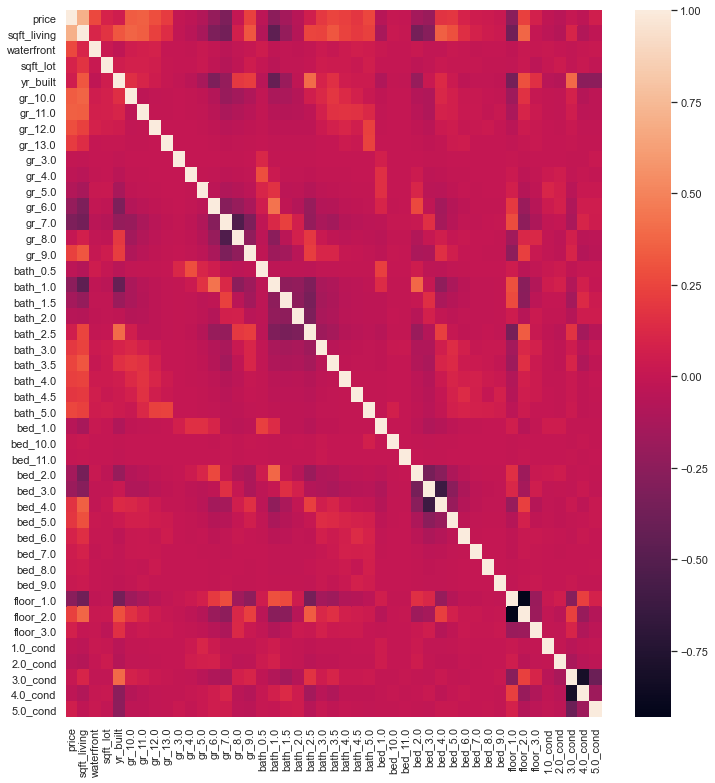

In [69]:
sns.set(rc={'figure.figsize':(12, 13)})
sns.heatmap(df.corr())

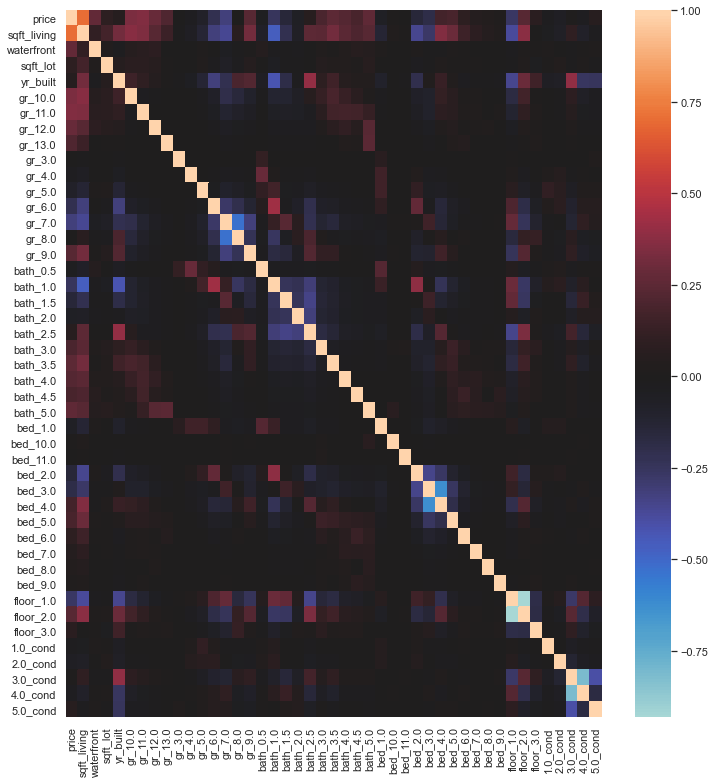

In [70]:
sns.heatmap(df.corr(), center=0);

In [71]:
price_corr = df.corr()['price'].map(abs).sort_values(ascending=False)

In [72]:
price_corr

price          1.000000
sqft_living    0.701929
gr_11.0        0.357592
gr_10.0        0.340948
gr_7.0         0.316079
gr_12.0        0.291070
waterfront     0.264308
floor_1.0      0.263539
bath_5.0       0.253905
bath_3.5       0.246945
bath_1.0       0.244554
gr_9.0         0.235864
floor_2.0      0.235520
bath_4.0       0.224650
gr_13.0        0.211807
gr_6.0         0.209460
bath_3.0       0.198574
bath_4.5       0.190069
bed_5.0        0.189931
bed_3.0        0.184052
bed_4.0        0.177362
bed_2.0        0.144735
bath_1.5       0.139568
sqft_lot       0.089879
bed_6.0        0.087791
gr_5.0         0.084548
floor_3.0      0.076239
bath_2.5       0.058901
bed_1.0        0.057846
5.0_cond       0.057504
bath_2.0       0.056049
yr_built       0.053965
2.0_cond       0.051431
bed_7.0        0.046989
bath_0.5       0.039920
bed_8.0        0.037731
gr_4.0         0.031617
4.0_cond       0.030751
1.0_cond       0.019886
bed_9.0        0.016051
bed_10.0       0.008974
3.0_cond       0

In [73]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_corr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

In [74]:
#df_corr = df[(df_corr>.75) & (df_corr <1)]
df_corr

,cc
pairs,
"(price, price)",1.000000
"(floor_2.0, floor_1.0)",0.930329
"(3.0_cond, 4.0_cond)",0.812373
"(price, sqft_living)",0.701929
"(bed_3.0, bed_4.0)",0.624757
...,...
"(bath_1.5, 1.0_cond)",0.000100
"(bed_6.0, gr_9.0)",0.000082
"(gr_3.0, bed_10.0)",0.000080


### First Simple Model

- Using Stats models

In [75]:
FSM_df = df[['price', 'sqft_living']]
price_target = df['price']

In [76]:
formula = 'price ~ sqft_living'

In [77]:
fsm = ols(formula, FSM_df).fit()

In [78]:
fsm_summary = fsm.summary()

In [79]:
fsm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:47:18   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

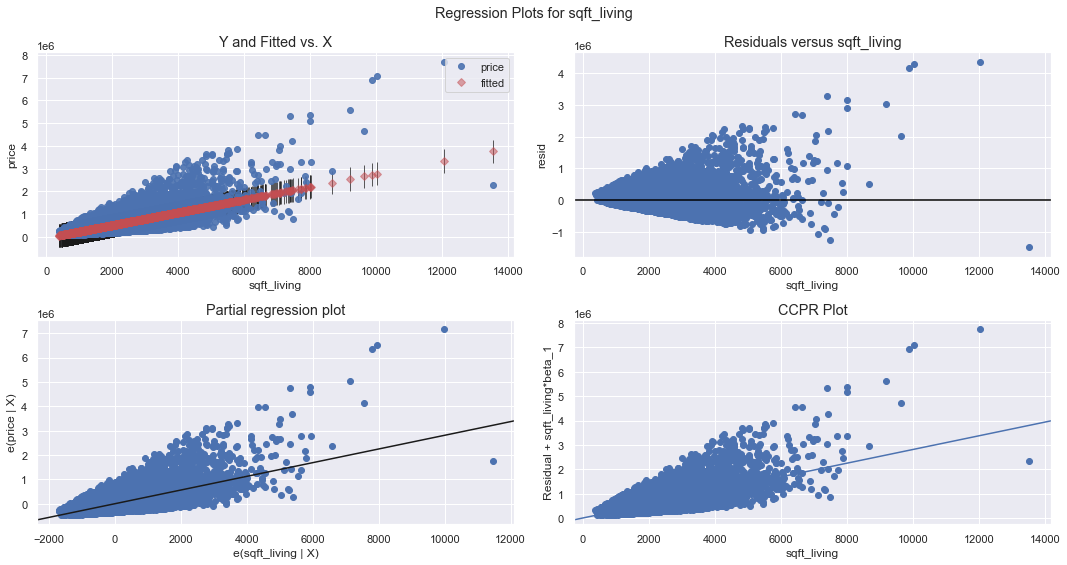

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(fsm, "sqft_living", fig=fig)
plt.show()

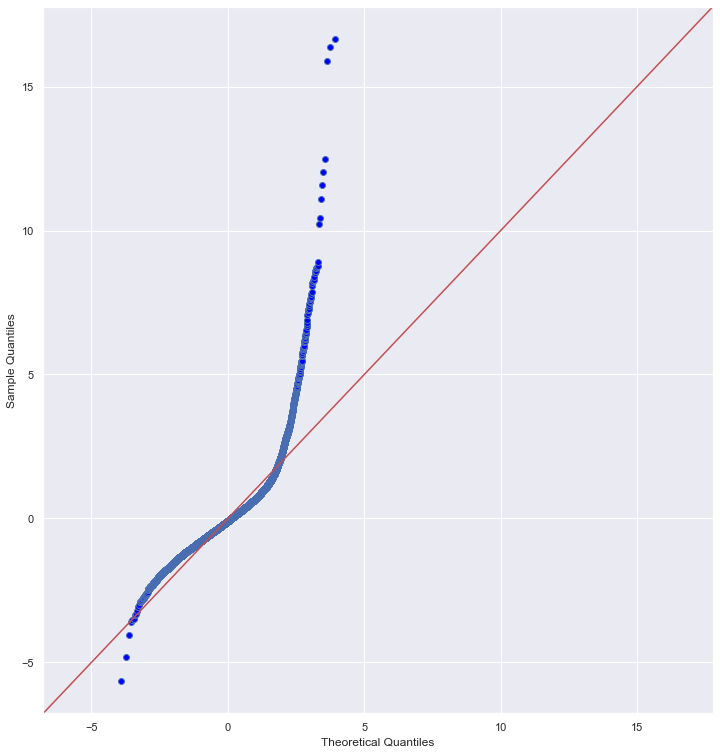

In [81]:
residuals = fsm.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [82]:
df['sqft_living'] = df['sqft_living'].map(lambda x:np.log(x))

In [83]:
fsmlog = ols(formula, FSM_df).fit()

In [84]:
fsmlog_summary = fsmlog.summary()

In [85]:
fsmlog_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:47:24   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Doing a log transformation made our rsquared value go down

Sci kit learn method

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [87]:
x = df[['sqft_living']]
y = df[['price']]

In [88]:
lr.fit(x, y)

LinearRegression()

In [89]:
lr.score(x, y)

0.3743559622122494

In [90]:
df

,price,sqft_living,waterfront,sqft_lot,yr_built,gr_10.0,gr_11.0,gr_12.0,gr_13.0,gr_3.0,...,bed_8.0,bed_9.0,floor_1.0,floor_2.0,floor_3.0,1.0_cond,2.0_cond,3.0_cond,4.0_cond,5.0_cond
0,221900.0,7.073270,0.0,5650,1955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,538000.0,7.851661,0.0,7242,1951,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,180000.0,6.646391,0.0,10000,1933,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,604000.0,7.580700,0.0,5000,1965,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,510000.0,7.426549,0.0,8080,1987,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,7.333023,0.0,1131,2009,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
21593,400000.0,7.745003,0.0,5813,2014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21594,402101.0,6.927558,0.0,1350,2009,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,400000.0,7.377759,0.0,2388,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
df.columns

Index(['price', 'sqft_living', 'waterfront', 'sqft_lot', 'yr_built', 'gr_10.0',
       'gr_11.0', 'gr_12.0', 'gr_13.0', 'gr_3.0', 'gr_4.0', 'gr_5.0', 'gr_6.0',
       'gr_7.0', 'gr_8.0', 'gr_9.0', 'bath_0.5', 'bath_1.0', 'bath_1.5',
       'bath_2.0', 'bath_2.5', 'bath_3.0', 'bath_3.5', 'bath_4.0', 'bath_4.5',
       'bath_5.0', 'bed_1.0', 'bed_10.0', 'bed_11.0', 'bed_2.0', 'bed_3.0',
       'bed_4.0', 'bed_5.0', 'bed_6.0', 'bed_7.0', 'bed_8.0', 'bed_9.0',
       'floor_1.0', 'floor_2.0', 'floor_3.0', '1.0_cond', '2.0_cond',
       '3.0_cond', '4.0_cond', '5.0_cond'],
      dtype='object')

In [92]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [93]:
formula

'price~sqft_living+waterfront+sqft_lot+yr_built+gr_10.0+gr_11.0+gr_12.0+gr_13.0+gr_3.0+gr_4.0+gr_5.0+gr_6.0+gr_7.0+gr_8.0+gr_9.0+bath_0.5+bath_1.0+bath_1.5+bath_2.0+bath_2.5+bath_3.0+bath_3.5+bath_4.0+bath_4.5+bath_5.0+bed_1.0+bed_10.0+bed_11.0+bed_2.0+bed_3.0+bed_4.0+bed_5.0+bed_6.0+bed_7.0+bed_8.0+bed_9.0+floor_1.0+floor_2.0+floor_3.0+1.0_cond+2.0_cond+3.0_cond+4.0_cond+5.0_cond'

In [94]:
pred_sum

'sqft_living+waterfront+sqft_lot+yr_built+gr_10.0+gr_11.0+gr_12.0+gr_13.0+gr_3.0+gr_4.0+gr_5.0+gr_6.0+gr_7.0+gr_8.0+gr_9.0+bath_0.5+bath_1.0+bath_1.5+bath_2.0+bath_2.5+bath_3.0+bath_3.5+bath_4.0+bath_4.5+bath_5.0+bed_1.0+bed_10.0+bed_11.0+bed_2.0+bed_3.0+bed_4.0+bed_5.0+bed_6.0+bed_7.0+bed_8.0+bed_9.0+floor_1.0+floor_2.0+floor_3.0+1.0_cond+2.0_cond+3.0_cond+4.0_cond+5.0_cond'

In [95]:
##################### model = ols(formula, df).fit()

In [96]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price'], predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:47:25   Log-Likelihood:            -2.9549e+05
No. Observations:               21596   AIC:                         5.911e+05
Df Residuals:                   21556   BIC:                         5.914e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.95e+06   8.42e+04     35.026      0.000    2.78e+06    3.11e+06
sqft_living    2.5e+05   7220.685     34.619      0.000    2.36e+05    2.64e+05
waterfront   7.435e+05   1.79e+04     41.596      0.000    7.08e+05    7.78e+05
sqft_lot       -0.2107      0.036     -5.902      0.000      -0.281      -0.141
yr_built    -3169.0362     67.210    -47.151      0.000   -3300.773   -3037.299
gr_10.0      2.942e+05   2.29e+04     12.842      0.000    2.49e+05    3.39e+05
gr_11.0        5.8e+05   2.45e+04     23.629      0.000    5.32e+05    6.28e+05
gr_12.0      1.082e+06    3.1e+04     34.891      0.000    1.02e+06    1.14e+06
gr_13.0      2.348e+06   5.98e+04     39.238      0.000    2.23e+06    2.47e+06
gr_3.0      -2.837e+05   1.96e+05     -1.451      0.147   -6.67e+05    9.95e+04
gr_4.0      -2.708e+05   4.36e+04     -6.213      0.000   -3.56e+05   -1.85e+05
gr_5.0      -3.283e+05   2.43e+04    -13.529      0.000   -3.76e+05   -2.81e+05
gr_6.0      -2.881e+05   2.15e+04    -13.388      0.000    -3.3e+05   -2.46e+05
gr_7.0      -1.959e+05   2.14e+04     -9.135      0.000   -2.38e+05   -1.54e+05
gr_8.0       -8.25e+04   2.17e+04     -3.794      0.000   -1.25e+05   -3.99e+04
gr_9.0       9.422e+04   2.23e+04      4.232      0.000    5.06e+04    1.38e+05
bath_0.5     1.243e+05   2.52e+04      4.935      0.000    7.49e+04    1.74e+05
bath_1.0     1.436e+05   9069.825     15.832      0.000    1.26e+05    1.61e+05
bath_1.5     1.431e+05   9576.957     14.940      0.000    1.24e+05    1.62e+05
bath_2.0     1.588e+05   9972.136     15.923      0.000    1.39e+05    1.78e+05
bath_2.5     1.566e+05   1.07e+04     14.646      0.000    1.36e+05    1.78e+05
bath_3.0     2.434e+05   1.14e+04     21.378      0.000    2.21e+05    2.66e+05
bath_3.5     2.785e+05   1.26e+04     22.070      0.000    2.54e+05    3.03e+05
bath_4.0      4.09e+05   1.71e+04     23.906      0.000    3.75e+05    4.43e+05
bath_4.5     4.717e+05   2.09e+04     22.596      0.000    4.31e+05    5.13e+05
bath_5.0     8.208e+05   2.83e+04     28.990      0.000    7.65e+05    8.76e+05
bed_1.0      4.043e+05   2.87e+04     14.083      0.000    3.48e+05    4.61e+05
bed_10.0     1.786e+05   1.14e+05      1.562      0.118   -4.56e+04    4.03e+05
bed_11.0     6.567e+04   1.94e+05      0.338      0.736   -3.15e+05    4.47e+05
bed_2.0      3.823e+05   2.52e+04     15.184      0.000    3.33e+05    4.32e+05
bed_3.0      3.279e+05    2.5e+04     13.103      0.000    2.79e+05    3.77e+05
bed_4.0      3.042e+05   2.51e+04     12.142      0.000    2.55e+05    3.53e+05
bed_5.0      3.209e+05   2.54e+04     12.654      0.000    2.71e+05    3.71e+05
bed_6.0      2.718e+05   2.73e+04      9.952      0.000    2.18e+05    3.25e+05
bed_7.0      2.299e+05   3.99e+04      5.759      0.000    1.52e+05    3.08e+05
bed_8.0      4.207e+05    5.9e+04      7.13

In [97]:
model = ols(formula, df).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
x = df['price']
y = df.drop('price', axis=1)

# show first simple and then add transforms - show process - iterative development of modelling 

In [ ]:
df['sqftlot_lg'] =np.log(df['sqft_lot'])
df['sqftlv15_lg'] =np.log(df['sqft_living'])
df['price_lg'] =np.log(df['price'])

In [ ]:
df.drop(['sqft_lot', 'sqft_living', 'price'], axis=1, inplace=True)

In [ ]:
outcome = 'price'
predictors = df.drop('price_lg', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [ ]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df['price_lg'], predictors_int).fit()
model.summary()

In [ ]:
x1 = predictors.drop(['gr_3.0'], axis=1)

In [ ]:
predictors_int = sm.add_constant(x1)
model = sm.OLS(df['price_lg'], predictors_int).fit()
model.summary()

In [ ]:
x2 = predictors.drop(['gr_3.0', 'gr_4.0', 'gr_5.0', 'gr_6.0', 'gr_7.0', 'gr_8.0'], axis=1)

In [ ]:
predictors_int = sm.add_constant(x2)
model = sm.OLS(df['price_lg'], predictors_int).fit()
model.summary()

In [ ]:
x3 = predictors.drop(['gr_3.0', 'gr_4.0', 'gr_5.0', 'gr_6.0', 'gr_7.0', 'gr_8.0', 'bed_11.0'], axis=1)

In [ ]:
predictors_int = sm.add_constant(x3)
model = sm.OLS(df['price_lg'], predictors_int).fit()
model.summary()

In [ ]:
x4 = predictors.drop(['gr_3.0', 'gr_4.0', 'gr_5.0', 'gr_6.0', 'gr_7.0', 'gr_8.0', 'bed_11.0', 'bed_10.0', 'bed_2.0', 'bed_3.0', 'bed_4.0', 'bed_5.0', 'bed_6.0', 'bed_7.0', 'bed_8.0', 'bed_9.0'], axis=1)

In [ ]:
predictors_int = sm.add_constant(x4)
model = sm.OLS(df['price_lg'], predictors_int).fit()
model.summary()

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
x = df[['sqftlv15_lg', 'gr_11.0']]
y = df[['price_lg']]

In [ ]:
lr.fit(x, y)

In [ ]:
lr.score(x, y)

In [ ]:
df['Age'] = df['yr_built'].apply(lambda x: old if x <= 1999 else recent if x >= 2000 and new < 2010 else 3)
df['Age'].value_counts()